In [1]:
include("LM.jl")
include("solvers.jl")

quasi_newton_bfgs (generic function with 1 method)

In [2]:
using ADNLPModels, JSOSolvers, NLSProblems, SolverBenchmark

In [3]:
FH(x) = [x[2]+x[1].^2-11, x[1]+x[2].^2-7]
x0H = [10., 20.]
himmelblau_nls = ADNLSModel(FH,x0H,2)

ADNLSModel - Nonlinear least-squares model with automatic differentiation backend ADModelBackend{
  ForwardDiffADGradient,
  ForwardDiffADHvprod,
  EmptyADbackend,
  EmptyADbackend,
  EmptyADbackend,
  ForwardDiffADHessian,
  EmptyADbackend,
}
  Problem name: Generic
   All variables: ████████████████████ 2      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 2     
            free: ████████████████████ 2                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ████████████████████ 2     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: (  0.00% sparsity)   4     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (  0.00% sparsity)   3     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            

In [4]:
objectif, gradient, stats = LM(himmelblau_nls, himmelblau_nls.meta.x0, 1e-10, 1e-10)
@test stats.status == :first_order

┌ Info:   iter      #F    ‖F(x)‖    ‖J'.F‖           status       ‖d‖         λ  
└ @ Main /Users/jules/Desktop/ENE6511/MTH6511-Hiv2024/stage/LM.jl:40
┌ Info:      0       3   1.0e+02   2.0e+03          success   1.1e+01   0.0e+00
└ @ Main /Users/jules/Desktop/ENE6511/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:      1       5   2.4e+01   2.5e+02          success   5.2e+00   0.0e+00
└ @ Main /Users/jules/Desktop/ENE6511/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:      2       7   4.9e+00   3.0e+01          success   2.2e+00   0.0e+00
└ @ Main /Users/jules/Desktop/ENE6511/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:      3       9   7.0e-01   3.2e+00          success   8.5e-01   0.0e+00
└ @ Main /Users/jules/Desktop/ENE6511/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:      4      11   2.8e-02   1.2e-01          success   1.7e-01   0.0e+00
└ @ Main /Users/jules/Desktop/ENE6511/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:      5      13   5.1e-05   2.1e-04          success   7.2e-03   0.0e+00
└ @ Main /Users/jules/De

Test Passed

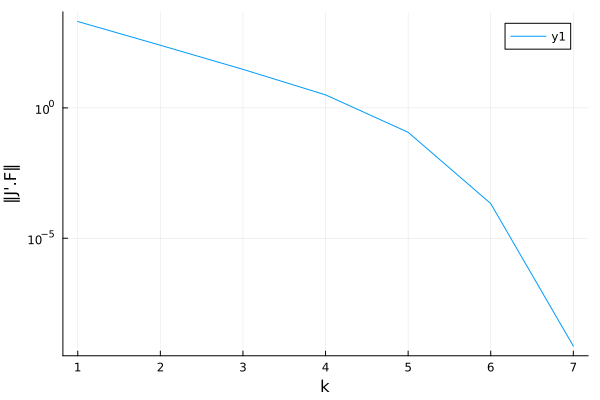

In [5]:
using Plots

rangs = [k for k = 1:length(gradient)]
plot(rangs, gradient, xlabel="k", ylabel="‖J'.F‖", yaxis =:log10)

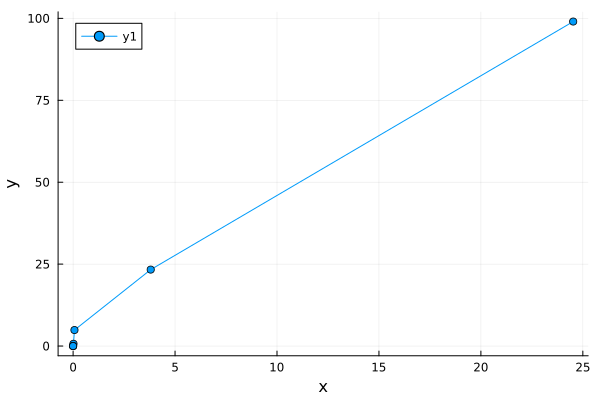

In [59]:
X=[]
Y=[]
for k = 1:length(objectif)
    push!(X,objectif[k][1])
    push!(Y,objectif[k][2])
end

plot(X, Y, xlabel="x", ylabel="y",marker=:circle)

In [68]:
x = y = range(-4, stop = 4, length = 100)
contour(x, y, (x, y) -> [x^2 + y - 11 , x + y^2 -7^2])

ErrorException: syntax: missing separator in array expression

In [61]:
problems_names = setdiff(names(NLSProblems), [:NLSProblems])
problems = (eval(problem)() for problem ∈ problems_names)

Base.Generator{Vector{Symbol}, var"#41#42"}(var"#41#42"(), [:BNST2, :BNST3, :LVcon501, :LVcon502, :LVcon503, :LVcon504, :LVcon511, :LVcon512, :LVcon513, :LVcon514  …  :tp354, :tp355, :tp358, :tp370, :tp371, :tp372, :tp373, :tp379, :tp394, :tp395])

In [92]:
fct_test = eval(problems_names[3])()
obj, grad, stats = LM(fct_test, fct_test.meta.x0, 1e-10, 1e-10)


┌ Info:   iter      #F    ‖F(x)‖    ‖J'.F‖           status       ‖d‖         λ  
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:40
┌ Info:      0       3   4.1e+01   6.4e+02          success   5.3e+00   0.0e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:      1       4   4.1e+01   6.4e+02       increase_λ   3.4e+00   1.0e-06
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:      2       5   4.1e+01   6.4e+02       increase_λ   3.4e+00   1.0e-05
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:      3       6   4.1e+01   6.4e+02       increase_λ   3.4e+00   1.0e-04
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:      4       7   4.1e+01   6.4e+02       increase_λ   3.4e+00   1.0e-03
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:      5       8   4.1e+01   6.4e+02       increase_λ   3.4e+00   1.0e-02
└ @ Main /Users/jules/Desktop/Stage/

┌ Info:     67     121   4.7e-02   3.7e-01          success   1.0e-01   2.3e-01
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     68     123   1.2e-02   1.9e-01          success   7.0e-02   1.2e-01
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     69     125   5.6e-04   7.6e-03          success   1.5e-02   5.8e-02
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     70     127   5.7e-06   2.4e-05          success   8.2e-04   2.9e-02
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     71     129   1.9e-08   1.1e-08          success   1.1e-05   1.5e-02
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81


(Any[[-1.6667181052756106, -0.8329318885665526, -1.666556107189947, -0.8330328881071515, -1.6666147133363505, -0.8329517362196708, -1.666481755233896, -0.8332591622941115, -1.6670923078274238, -0.8317930835819017  …  6.924460104964572, 2.7996268642264877, 7.043025385501142, 2.648844775012957, 6.480104077437963, 3.413612864233354, 9.411494862693987, 0.5881756592433052, 0.27099141934707416, 34.36679869749314], [-1.2394819464361624, -1.1158837353662285, -1.0722095945188022, -1.335807286755315, -1.14340487639551, -1.242065186145608, -1.1126761254109931, -1.2827331704415934, -1.1267539695067468, -1.2639570723539078  …  1.8883962316742073, 2.870230675724652, 1.9682619142808344, 2.9453022442316423, 2.209669466841975, 2.1245053725560856, 1.512197484828492, 6.220936704567852, 20.303480690938866, 53.512170930588425], [-1.2394819464362792, -1.1158837353660753, -1.0722095945187617, -1.3358072867553656, -1.1434048763955333, -1.2420651861455756, -1.11267612541099, -1.2827331704415952, -1.12675396950

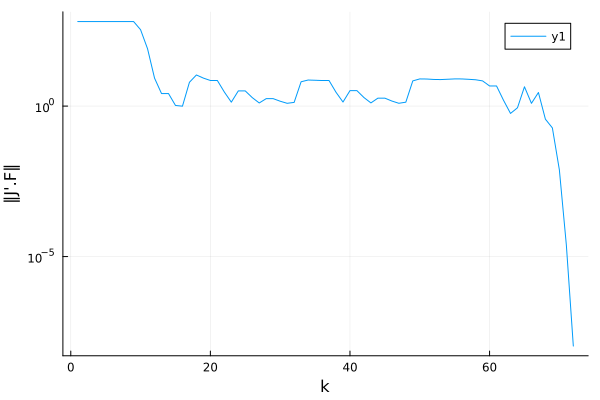

In [93]:
rangs = [k for k = 1:length(grad)]
plot(rangs, grad, xlabel="k", ylabel="‖J'.F‖",yaxis =:log10)

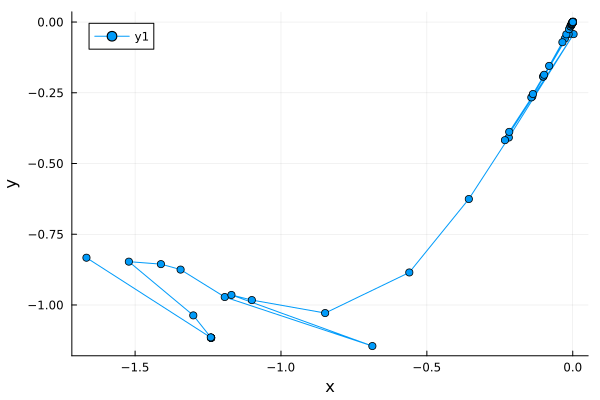

In [78]:
X=[]
Y=[]
for k = 1:length(obj)
    push!(X,obj[k][1])
    push!(Y,obj[k][2])
end

plot(X, Y, xlabel="x", ylabel="y",marker=:circle)

In [94]:
fct_test = eval(problems_names[4])()
obj, grad, stats = LM(fct_test, fct_test.meta.x0, 1e-10, 1e-10)


┌ Info:   iter      #F    ‖F(x)‖    ‖J'.F‖           status       ‖d‖         λ  
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:40
┌ Info:      0       3   2.5e+01   8.6e+02          success   2.4e+00   0.0e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81


┌ Info:      1       5   8.8e+00   7.2e+01          success   7.5e-01   0.0e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:      2       7   8.4e+00   1.7e+00          success   1.1e-01   0.0e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:      3       9   8.4e+00   2.2e-02          success   7.3e-03   0.0e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:      4      11   8.4e+00   6.8e-04          success   3.5e-04   0.0e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:      5      13   8.4e+00   3.0e-04          success   1.8e-04   0.0e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:      6      15   8.4e+00   3.5e-04          success   2.0e-04   0.0e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:      7      17   8.4e+00   4.1e-04          success   2.4e-04   0.0e+00
└ @ Main /Users/jules/Desktop/Stage/MT

┌ Info:     37      77   8.4e+00   3.9e-02          success   2.1e-02   0.0e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     38      79   8.4e+00   4.7e-02          success   2.5e-02   0.0e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     39      81   8.4e+00   5.6e-02          success   2.9e-02   0.0e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     40      83   8.4e+00   6.7e-02          success   3.4e-02   0.0e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     41      85   8.4e+00   8.2e-02          success   3.9e-02   0.0e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     42      87   8.4e+00   1.0e-01          success   4.6e-02   0.0e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     43      89   8.4e+00   1.3e-01          success   5.4e-02   0.0e+00
└ @ Main /Users/jules/Desktop/Stage/MT

┌ Info:     57     114   8.4e+00   1.1e+01       increase_λ   9.0e-01   1.0e-04
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     58     115   8.4e+00   1.1e+01       increase_λ   9.0e-01   1.0e-03
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     59     116   8.4e+00   1.1e+01       increase_λ   9.0e-01   1.0e-02
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     60     117   8.4e+00   1.1e+01       increase_λ   9.0e-01   1.0e-01
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     61     118   8.4e+00   1.1e+01       increase_λ   8.9e-01   1.0e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     62     120   8.3e+00   8.8e+00          success   4.3e-01   5.0e-01
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     63     121   8.3e+00   8.8e+00       increase_λ   1.0e+00   5.0e+00
└ @ Main /Users/jules/Desktop/Stage/MT

┌ Info:     83     157   7.0e+00   5.3e+00          success   3.4e-01   1.5e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     84     159   6.9e+00   4.7e+01          success   1.1e+00   1.5e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     85     161   6.1e+00   2.2e+01          success   1.0e+00   7.6e-01
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     86     162   6.1e+00   2.2e+01       increase_λ   2.1e+00   7.6e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     87     164   6.1e+00   3.1e+00          success   5.1e-02   3.8e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     88     166   6.0e+00   2.7e+00          success   1.7e-01   1.9e+00
└ @ Main /Users/jules/Desktop/Stage/MTH6511-Hiv2024/stage/LM.jl:81
┌ Info:     89     168   5.7e+00   9.4e+00          success   6.0e-01   9.5e-01
└ @ Main /Users/jules/Desktop/Stage/MT

(Any[[-2.2415916080681875, -2.2415228125230806, -2.241518590362203, -2.2415223660094363, -2.2415188366834724, -2.241522306820094, -2.241518711879225, -2.2415226222353026, -2.24151818912911, -2.2415228125230806  …  5.693959253453301, 5.401697392212215, 5.4017582592980435, 5.401703829180757, 5.401754708297133, 5.401704682458291, 5.401756507491991, 5.401700135412225, 5.401764043531318, 5.399760720301106], [-2.003999227031097, -2.003826491244821, -2.0038158676757325, -2.0038253664832464, -2.0038164880392872, -2.0038252175683073, -2.003816173414799, -2.003826012449059, -2.0038148560329074, -2.003826491244821  …  0.48008118651303944, 0.4554132119656818, 0.45544223570436543, 0.45541628709950793, 0.45544053978011173, 0.45541669390746187, 0.455441400438074, 0.4554145200331053, 0.4554450033531941, 0.45149350268488025], [-1.9706855431199752, -1.9704166297176, -1.970418661734331, -1.9704186194092883, -1.9704176033221743, -1.9704189027567562, -1.9704180548781336, -1.9704176447732173, -1.97042031065

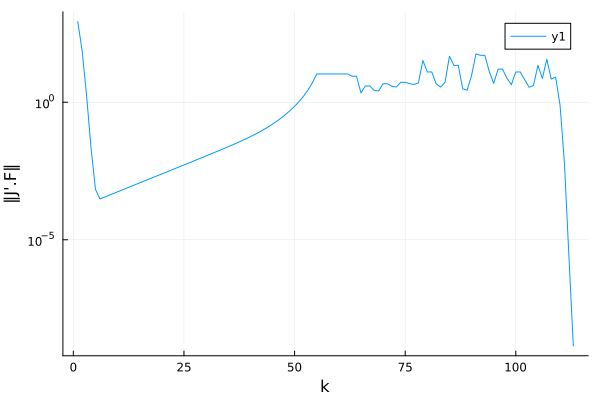

In [95]:
rangs = [k for k = 1:length(grad)]
plot(rangs, grad, xlabel="k", ylabel="‖J'.F‖", yaxis =:log10)

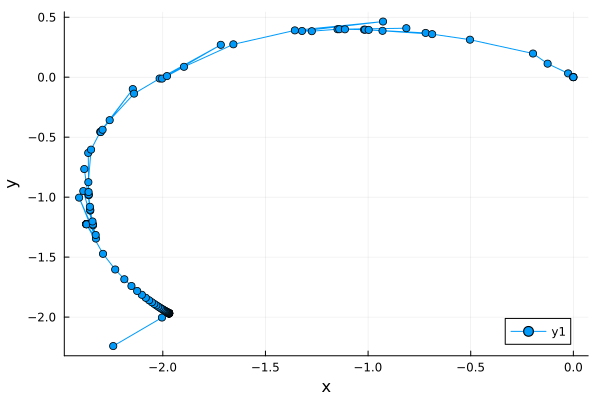

In [81]:
X=[]
Y=[]
for k = 1:length(obj)
    push!(X,obj[k][1])
    push!(Y,obj[k][2])
end

plot(X, Y, xlabel="x", ylabel="y",marker=:circle)

In [100]:
fct_test.nls_meta

   All residuals: ████████████████████ 54    
          linear: ██████████████⋅⋅⋅⋅⋅⋅ 36    
       nonlinear: ███████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 18    
            nnzj: ( 91.67% sparsity)   90    
            nnzh: ( 91.43% sparsity)   18    



In [101]:
problems_names[4]

:LVcon502